In [3]:
from __future__ import print_function, division
import numpy as np
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(99)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:

##this function will fit a line woth statsmodels packages, 
##both with and without including the noise int he fir parameter (WLS and OLS respectively)
##also i can use the statsmodels.formula package passing it a formula, which i will need
##when i want to fit a curve, not a straight line, to the data
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

def line(a, b, x):
    return a*x + b

## creating simulated data: just a line 
## then i fit it with a line fit (linear first degree fit) and plotting it

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.961e+32
Date:                Thu, 19 Oct 2017   Prob (F-statistic):               0.00
Time:                        10:54:25   Log-Likelihood:                 3046.8
No. Observations:                 100   AIC:                            -6092.
Df Residuals:                      99   BIC:                            -6089.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7000   2.34

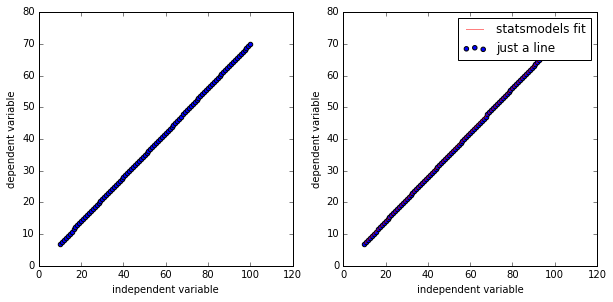

In [5]:
x = np.linspace(10,100,100)
y = line(0.7, 0, x)

mrnew = myregression(x, y)
xnew = np.linspace(10,100,10)
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "just a line")
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "just a line")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, 
         label = "statsmodels fit")
ax2.legend()


# adding noise to the line

linear regression slope                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.963e+04
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          1.83e-124
Time:                        10:54:28   Log-Likelihood:                -232.53
No. Observations:                 100   AIC:                             467.1
Df Residuals:                      99   BIC:                             469.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7027      0

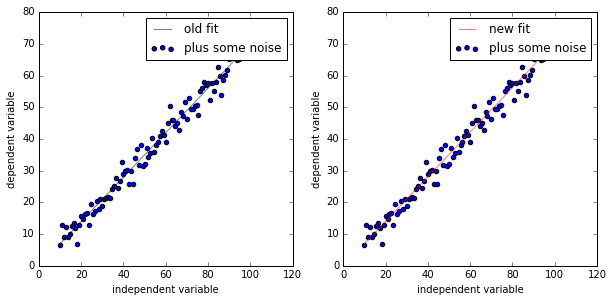

In [6]:
y = y + np.random.randn(100) * 2.5
mrold = mrnew

#I use just OLD: the ordinary square fit which does not take the error bars 
#into account
#refer to statsmodels documentation!!
mrnew = myregression(x, y)

fig = pl.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5, label='old fit')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax = fig.add_subplot(222)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, label='new fit')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

## adding a bit of curvature to my line

linear regression slope                             WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            WLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.877e+04
Date:                Thu, 19 Oct 2017   Prob (F-statistic):          1.09e-114
Time:                        10:54:31   Log-Likelihood:                -260.53
No. Observations:                 100   AIC:                             523.1
Df Residuals:                      99   BIC:                             525.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7400      0

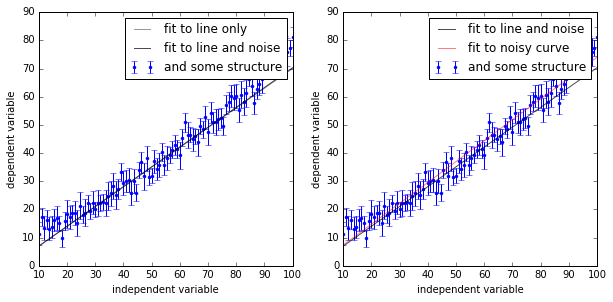

In [7]:
#y = y+np.cos(x/100*2*np.pi*10.0)
y = y + 3e-3 * ((x - 50)**2)
mrolder = mrold
mrold = mrnew

#now i fit the data taking into account the errorbars: 
#u ise WLS (weighted square fit) 
#instead of OLS (ordinary square fit)
mrnew = myregression(x, y, method='W')

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
e = np.random.rand(100)*2.5+2.5
ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
ax.plot(xnew, mrolder.predict(xnew), 'k', alpha=0.4,
       label = "fit to line only")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.7,
       label = "fit to line and noise")

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax = fig.add_subplot(222)
ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.7,      
       label = "fit to line and noise")

ax.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5,
       label = "fit to noisy curve")

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()


numpy polyfit parameters [  3.50185975e-03  -3.92394408e-01   8.66708025e+00]
mean of residuals 0.29 (2.90e-01)
sum squared of residuals 32.75 (3.28e+01)


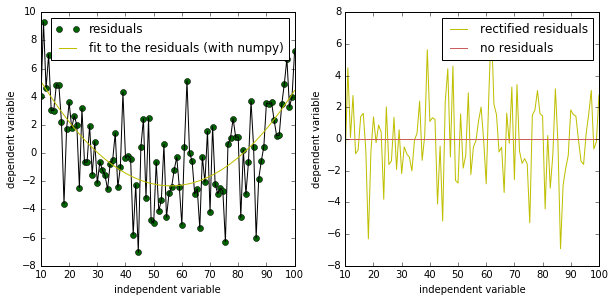

In [8]:
#to fit a curve i can use statsmodels formula, or i can use scipy polyfit. 
#here i take the residuals from the previous line regression, 
#which are a curve, and i fir those with a second degree polynomial

#here is an example of how to do it with scipy.polyfit  
#(the number 2 refers to the degree of the polynomial i want to fit : 
#refer to the scipy documentation!)

mrres = np.polyfit(x, y-mrnew.predict(x), 2)
#these are the parameters of the fit: the a b and c in 
#ax^2 + bx + c
print ('numpy polyfit parameters', mrres)
fig = pl.figure(figsize=(10,10))
ax=fig.add_subplot(221)
ax.plot(x, y-mrnew.predict(x), 'o', color='DarkGreen', label='residuals')
ax.plot(x, y-mrnew.predict(x), 'k-')

ax.plot(x, mrres[0] * x**2 + mrres[1] * x + mrres[2], 'y',
       label = 'fit to the residuals (with numpy)')
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax=fig.add_subplot(222)

#and i plot the "residual of the residuals".... just for fun. 
#this is not normally something which one would include in the analysis
ax.plot(x,y - mrnew.predict(x) - (mrres[0] * x**2 + 
                                  mrres[1] * x + 
                                  mrres[2]), 'y',
       label = "rectified residuals")
ax.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed',
       label = "no residuals")

print ('mean of residuals {0:.2f} ({0:.2e})'.format(
                mean(y - mrnew.predict(x) - (mrres[1] +  mrres[0] * (x)))))
print ('sum squared of residuals {0:.2f} ({0:.2e})'.format(
        np.sqrt(sum((y - mrnew.predict(x))**2))))
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

# of course i could have fit a curve to my data in the first place: i did not need to do a line fit, and then fit a curve to the residuals. that may cme in handy if the residuals have a lot of complex structure: for example if i think they may be periodic and i may want to fit a sine wave to it, but generally if i see a set of data which is curvy iw ill fit a curve to it: 

## lets fit a second degree polynomial to the data i had created with y = y+3e-3 ((x-50)**2)


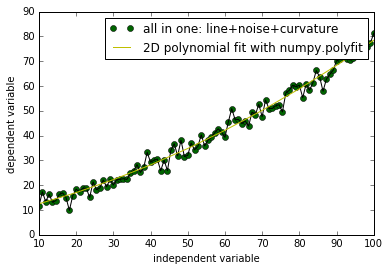

In [9]:

##second degree polynomial: arguments are i
#independent variable, dependent variable, degree of the polynomial
mrnew = np.polyfit(x, y, 2)

pl.plot(x, y, 'o', color='DarkGreen', label='all in one: ' + 
        'line+noise+curvature')
pl.plot(x, y, 'k-')


pl.plot(xnew, np.poly1d(mrnew)(xnew), 'y', alpha=1, 
        label = '2D polynomial fit with numpy.polyfit')

pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

In [17]:
#with statsmodels that is:
%memit smf.ols(formula="y ~ x1 + I((x1)) + I((x1)**2)", data={"x1" : x, "y" : y} ).fit()
# print (smreg.summary())
# pl.plot(x, y, 'o', color='DarkGreen', label='all in one : ' + 
#         'line+noise+curvature')
# pl.plot(x, y, 'k-')


# pl.plot(xnew, smreg.predict(exog=dict(x1=xnew)), 
#         label = '2D polynomial fit with statsmodels.ols')
# pl.xlabel('independent variable')
# pl.ylabel('dependent variable')
# pl.legend()

# %memit smf.ols(formula="y ~ x1 + I((x1)) + I((x1)**2)", data={"x1" : x, "y" : y} ).fit()

mean of residuals 0.00 (4.01e-14)
sum squared of residuals 0.00 (2.00e-06)


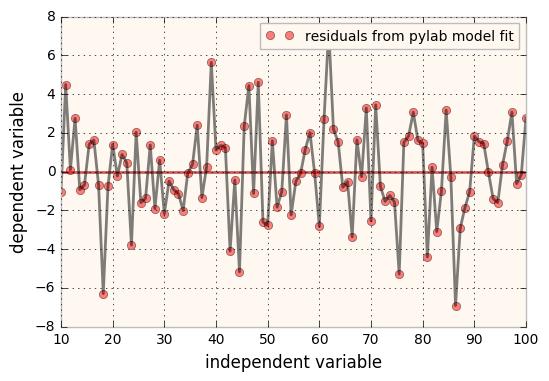

In [9]:
mrold = mrnew
mrnew = np.polyfit(x, y, 2)
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')

e = np.random.rand(100)*2.5+2.5
#pl.errorbar(x, y, yerr=e, label = "and some structure")
pl.plot(x, y - np.poly1d(mrnew)(x), 'ro', alpha=0.5,
       label = 'residuals from pylab model fit')
pl.plot(x, y - np.poly1d(mrnew)(x), 'k', alpha=0.5)


pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()
print ('mean of residuals {0:.2f} ({0:.2e})'.format(mean(y - 
                                                       (mrnew[2] + 
                                                       mrnew[1] * (x) + 
                                                       mrnew[0] * (x**2)
                                                       ))))
print ('sum squared of residuals {0:.2f} ({0:.2e})'.format(np.sqrt(sum((y - 
                                                      (mrnew[2] + 
                                                       mrnew[1] * 
                         (x) + mrnew[0] * (x**2)))))))


# many more regression diagnostics!
http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_diagnostics.html